### **UNIVERSIDAD TORCUATO DI TELLA - MAESTRÍA EN ECONOMETRÍA**  

#### **ANÁLISIS ESTADÍSTICO MULTIVARIADO** 

**Profesora**: Clemente, Alejandra.  
**Ayudante**: Mendoza Greco, Maximiliano.  
**Alumnos**: Dignani, Franco; Guzzi, David.

**Ciclo lectivo**: Segundo Trimestre 2024.

#### **1. ANÁLISIS EXPLORATORIO**

##### **1.1. ANÁLISIS DESCRIPTIVO DE LAS VARIABLES**

In [1]:
#Importación de librerías.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import linkage, fcluster

from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from sklearn.utils.extmath import randomized_svd

from tabulate import tabulate

#Configuraciones de visualización.
pd.options.display.float_format = '{:.4f}'.format
pd.set_option('display.max_columns', None)


En este estudio se han seleccionado los países miembros de la **Organización para la Cooperación y el Desarrollo Económicos (OCDE)** junto con **Argentina** para analizar diversos indicadores económicos y sociales relacionados, de forma general, con la **Agricultura**. La elección de los países de la OCDE se basa en su diversidad económica y geográfica, así como en su relevancia en políticas internacionales y estándares de desarrollo. Argentina fue incluida como un caso de estudio adicional, proporcionando una perspectiva contrastante respecto a los países desarrollados. Se considera que este enfoque permite **comparar y contrastar una amplia gama de datos y naciones**, al tiempo de identificar patrones y tendencias clave. 
Para el presente análisis, se ha seleccionado el **año 2019** como punto de referencia clave (dado que se considera representa el último año con condiciones económicas y sociales estables antes del impacto global de la pandemia de COVID-19) en conjunto con las **siguientes variables** que se resumen y definen del siguiente modo:

- **Agricultural land (% of land area):** Mide la proporción de tierras agrícolas, que incluye tierras arables, cultivos permanentes y pastos permanentes.
- **Arable land (% of land area):** Mide la proporción de tierra que se utiliza para cultivos temporales, pastos temporales y jardines, excluyendo tierras abandonadas por cultivo itinerante.
- **Agricultural raw materials exports (% of merchandise exports):** Mide proporción de exportaciones de materias primas agrícolas dentro del total de exportaciones de mercancías. 
- **Agricultural raw materials imports (% of merchandise imports):** Mide la proporción de las importaciones de materias primas agrícolas respecto al total de importaciones de mercancías.
- **Agriculture, forestry, and fishing, value added (% of GDP):** Representa el valor agregado neto de los sectores de agricultura, silvicultura y pesca como porcentaje del PIB. Incluye la producción agrícola, ganadera, caza, pesca y silvicultura, y excluye la depreciación de activos y la degradación de recursos naturales.
- **Employment in agriculture (% of total employment) (modeled ILO estimate):** Mide la proporción de personas empleadas en el sector agrícola, que incluye actividades de agricultura, caza, silvicultura y pesca, en comparación con el total de empleo.
- **Rural population (% of total population):** Mide la proporción de personas que viven en áreas rurales como porcentaje de la población.

**Nota:** Más allá de contar con variables relacionadas de forma general con la Agricultura, la elección de variables responde a la identificación de aquellas variables dentro de la base de datos suministrada ([World Bank Group: World Development Indicators](https://databank.worldbank.org/source/world-development-indicators#)) que no presenten datos nulos al tiempo de que las mismas estén expresadas en una misma unidad de medida (variables relativas a una magnitud, como el PBI) para evitar posibles futuros problemas a lo largo del estudio.


In [2]:
#Lectura y visualización de matriz de datos
path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\MECMT04\TP AEM - database.xlsx"
df = pd.read_excel(path)
df

,Country Name,Country Code,Agricultural land (% of land area),Arable land (% of land area),Agricultural raw materials exports (% of merchandise exports),Agricultural raw materials imports (% of merchandise imports),"Agriculture, forestry, and fishing, value added (% of GDP)",Employment in agriculture (% of total employment) (modeled ILO estimate),Rural population (% of total population)
0,Argentina,ARG,42.5908,14.9117,0.8813,1.0457,5.3186,7.3309,8.0090
1,Australia,AUS,47.1238,3.9746,2.1059,0.6622,2.1131,2.5583,13.8760
2,Austria,AUT,32.1281,16.0631,1.5208,1.8149,1.0524,3.6561,41.4850
3,Belgium,BEL,44.7960,28.3120,1.2331,1.0485,0.6700,0.9196,1.9590
4,Canada,CAN,6.4344,4.3107,3.6934,0.8181,1.6971,1.5105,18.5180
5,Switzerland,CHE,38.1050,10.0936,0.1410,0.5495,0.6477,2.5380,26.1510
6,Chile,CHL,15.2390,1.7577,6.9273,0.7305,3.9878,9.0692,12.3570
7,Colombia,COL,39.9766,1.9040,4.0533,0.8649,6.4107,16.1112,18.8960
8,Costa Rica,CRI,34.7826,4.7591,1.8074,1.0280,4.2021,15.3081,19.9240
9,Czechia,CZE,45.6400,32.1800,1.3095,1.0655,1.8608,2.6638,26.0790


In [3]:
df.columns = df.columns.str.replace(r"\s*\(.*\)", "", regex=True) #Se elimina información entre paréntesis.
ndf = df.iloc[:,1:].set_index('Country Code') #ndf: numereric pandas DataFrame.
ndf.info() #Breve información de la matriz de datos (cantidad de observaciones, tipo de formatos, etc.)

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, ARG to USA
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Agricultural land                                39 non-null     float64
 1   Arable land                                      39 non-null     float64
 2   Agricultural raw materials exports               39 non-null     float64
 3   Agricultural raw materials imports               39 non-null     float64
 4   Agriculture, forestry, and fishing, value added  39 non-null     float64
 5   Employment in agriculture                        39 non-null     float64
 6   Rural population                                 39 non-null     float64
dtypes: float64(7)
memory usage: 2.4+ KB


In [4]:
#Función a utilizar para la obtención de estadísticas descriptivas a partir de una matriz de datos.
def estadisticas_descriptivas(X: pd.DataFrame):
    """
    Cálculo de estadísticas descriptivas de una matriz de datos tipo DataFrame.

    Parámetro:
    df (pd.DataFrame): pandas DataFrame con los datos a analizar.

    Devuelve:
    pd.DataFrame: pandas DataFrame con las estadísticas descriptivas extendidas.
    """
    
    desc = X.describe()
    
    #Agrega coeficiente de variación (cv).
    cv = pd.DataFrame(X.std() / X.mean()).T
    cv.index = ['cv']    
    #Agrega curtosis (kurt).
    kurt = pd.DataFrame(X.kurt()).T
    kurt.index = ['kurt']    
    #Agrega asimetría (skew).
    skew = pd.DataFrame(X.skew()).T
    skew.index = ['skew']
    
    desc = pd.concat([desc, cv, kurt, skew], axis=0).reset_index()
    desc = desc.rename(columns={'index': 'Medida'})
    
    return desc
#Estadísticas descriptivas (para todos los países). Obs: Siempre se considerarán medidas muestrales. 
estadisticas_descriptivas(ndf)

,Medida,Agricultural land,Arable land,Agricultural raw materials exports,Agricultural raw materials imports,"Agriculture, forestry, and fishing, value added",Employment in agriculture,Rural population
0,count,39.0000,39.0000,39.0000,39.0000,39.0000,39.0000,39.0000
1,mean,38.3466,18.2686,2.4064,1.3690,2.4099,5.0710,21.2514
2,std,17.3003,13.6352,2.8458,0.6346,1.6200,4.3974,11.2517
3,min,2.6959,1.2000,0.1410,0.5495,0.2154,0.6816,1.9590
4,25%,29.9538,6.9086,0.7088,0.9026,1.3024,2.1510,12.8710
5,50%,43.1253,16.1404,1.3095,1.1496,1.9073,3.7783,19.2910
6,75%,48.3528,26.7491,2.6729,1.7546,3.3223,6.1308,28.8100
7,max,72.4230,59.8983,11.6780,2.9083,6.4107,18.1086,46.2710
8,cv,0.4512,0.7464,1.1826,0.4635,0.6722,0.8672,0.5295
9,kurt,-0.3435,0.8862,4.3522,0.1051,0.4283,1.9449,-0.3566


In [5]:
#Estadísticas descriptivas (sin incluir Argentina).
ndf_oecd = ndf.drop('ARG')
desc_oecd = estadisticas_descriptivas(ndf_oecd)

#Para Argentina.
ndf_arg = ndf.loc[['ARG']].reset_index()

display(desc_oecd, ndf_arg)

,Medida,Agricultural land,Arable land,Agricultural raw materials exports,Agricultural raw materials imports,"Agriculture, forestry, and fishing, value added",Employment in agriculture,Rural population
0,count,38.0000,38.0000,38.0000,38.0000,38.0000,38.0000,38.0000
1,mean,38.2349,18.3569,2.4465,1.3775,2.3334,5.0116,21.5999
2,std,17.5183,13.8070,2.8728,0.6408,1.5686,4.4405,11.1874
3,min,2.6959,1.2000,0.1410,0.5495,0.2154,0.6816,1.9590
4,25%,29.7273,6.6695,0.6938,0.8884,1.2844,2.1149,13.5078
5,50%,43.7443,16.3399,1.3380,1.1531,1.8841,3.7172,19.3630
6,75%,48.6791,27.4033,2.7402,1.7839,3.2592,5.7397,29.0370
7,max,72.4230,59.8983,11.6780,2.9083,6.4107,18.1086,46.2710
8,cv,0.4582,0.7521,1.1742,0.4652,0.6723,0.8860,0.5179
9,kurt,-0.4182,0.7749,4.1573,0.0087,0.9200,1.9896,-0.3474


,Country Code,Agricultural land,Arable land,Agricultural raw materials exports,Agricultural raw materials imports,"Agriculture, forestry, and fishing, value added",Employment in agriculture,Rural population
0,ARG,42.5908,14.9117,0.8813,1.0457,5.3186,7.3309,8.0090


La **matriz de datos** presenta **38 observaciones** pertenecientes a países de la **OCDE** y, sumando a **Argentina**, da **39 en total**. Si bien el **análisis considerará el conjunto de 39 observaciones**, aquí se dividen ambos grupos para **enriquecer la descripción** de cada una de las variables, que se pasa a comentar de forma general brevemente.

- En la gran mayoría de las variables se observa una **disparidad** importarte entre los **valores mínimos y máximos**. Esto nos da cuenta de la **heterogeneidad de economías** presentes en matriz de datos;
- A pesar de ello, considerando la **matriz de forma agrupada** puede observarse que esta heterogeneidad parecería desaparecer dado que los guarismos para los **promedios** y las **medianas** no son muy disímiles, lo que indicaría que los **casos extremos** dentro de la matriz no serían significativos. Por otro lado, no obstante, algunas variables presentan altos **desvíos estándar**, como el caso de *Agricultural land, Arable land, y Rural population*.
- Con relación a la **distribución de las variables**, la gran mayoría presentan distribuciones positivas sesgadas hacia la derecha al tiempo de evidenciar colas de distrbicuón alargadas (dados los valores extremos presentes).
- Comparativamente, **Argentina y OCDE** (considerando su mediana) presentan **similitudes** en variables como *Agricultural land, Arable land, y Agricultural imports*. Sin embargo, *Agricultural exports y Rural population* se encuentran por encima en naciones OCDE, y variables como *Agricultural value added y Agricultural employmernt* son superiores relativamente en Argentina.


##### **1.2. CÁLCULO DE MATRIZ DE VARIANZAS Y COVARIANZAS Y MATRIZ DE CORRELACIONES**

In [6]:
#Cálculo de matriz de varianzas y covarianzas (incluye todos los registros).
mcov = ndf.cov()
mcov

,Agricultural land,Arable land,Agricultural raw materials exports,Agricultural raw materials imports,"Agriculture, forestry, and fishing, value added",Employment in agriculture,Rural population
Agricultural land,299.2999,143.1640,-15.1587,-0.2389,-1.6690,5.1291,28.7369
Arable land,143.1640,185.9197,-9.1130,3.2334,-5.5738,-11.6462,21.6284
Agricultural raw materials exports,-15.1587,-9.1130,8.0986,0.5600,1.6387,1.1587,-1.0304
Agricultural raw materials imports,-0.2389,3.2334,0.5600,0.4027,0.0430,0.1770,2.0701
"Agriculture, forestry, and fishing, value added",-1.6690,-5.5738,1.6387,0.0430,2.6243,5.7188,-0.8835
Employment in agriculture,5.1291,-11.6462,1.1587,0.1770,5.7188,19.3369,7.1725
Rural population,28.7369,21.6284,-1.0304,2.0701,-0.8835,7.1725,126.6001


**Comentarios:**
- Se observa **variancia máxima** en *Agricultural land* y **varianza mínima** en *Agricultural imports*.
- Predominan **relaciones positivas** entre las variables, siendo la más significativa entre *Agricultural land y Arable land*. Por su parte, la **relación negativa** más significativa se produce entre *Agricultural land y Agricultural exports* (contraintuitivo, en principio).
- El análisis de la **matriz de correlación**, que presenta guarismos no influidos por las unidades de medida de las distintas variables, permitirá confirmar los anteriores comentarios.


In [7]:
#Cálculo de matriz de correlaciones (incluye todos los registros).
mcor = ndf.corr()
mcor

,Agricultural land,Arable land,Agricultural raw materials exports,Agricultural raw materials imports,"Agriculture, forestry, and fishing, value added",Employment in agriculture,Rural population
Agricultural land,1.0000,0.6069,-0.3079,-0.0218,-0.0596,0.0674,0.1476
Arable land,0.6069,1.0000,-0.2349,0.3737,-0.2523,-0.1942,0.1410
Agricultural raw materials exports,-0.3079,-0.2349,1.0000,0.3101,0.3555,0.0926,-0.0322
Agricultural raw materials imports,-0.0218,0.3737,0.3101,1.0000,0.0419,0.0634,0.2899
"Agriculture, forestry, and fishing, value added",-0.0596,-0.2523,0.3555,0.0419,1.0000,0.8028,-0.0485
Employment in agriculture,0.0674,-0.1942,0.0926,0.0634,0.8028,1.0000,0.1450
Rural population,0.1476,0.1410,-0.0322,0.2899,-0.0485,0.1450,1.0000


**Comentarios:**
- Las variables, al ser estandarizadas, confirmarían los **grados y direcciones** de relación comentados anteriormente. Incluso, los guarismos de relación serían más altos en términos absolutos.


In [8]:
#Medidas de variabilidad conjunta y medidas de correlación conjunta.
varianza_total = np.trace(mcov)
varianza_media = varianza_total / len(ndf.columns)
varianza_generalizada = np.linalg.det(mcov)
varianza_efectiva = varianza_generalizada**(1/len(ndf.columns))

dependencia_conjunta = np.linalg.det(mcor)
dependencia_efectiva = dependencia_conjunta**(1/(len(ndf.columns)-1))

medidas_globales = pd.DataFrame([[varianza_total, varianza_media, varianza_generalizada, varianza_efectiva, dependencia_conjunta, dependencia_efectiva]],
                                columns=['varianza_total', 'varianza_media', 'varianza_generalizada', 'varianza_efectiva', 'dependencia_conjunta', 'dependencia_efectiva'])
medidas_globales

,varianza_total,varianza_media,varianza_generalizada,varianza_efectiva,dependencia_conjunta,dependencia_efectiva
0,642.2821,91.7546,77537504.1862,13.3990,0.0665,0.6365


**Comentarios:**
- Dado el rango que pueden tomar los valores (0 a 1), las medidas de variabilidad global indicarían un **bajo nivel de varianza global** (considerando o no los valores no presentes en la diagonal principal).
- Las medidas globales indicarían un bajo nivel de **dependencia conjunta.** 


#### **2. ANÁLISIS DE COMPONENTES PRINCIPALES (PCA)**

##### **2.1. PCA - MATRIZ DE VARIANZA Y COVARIANZAS**

##### **2.1.1. VARIANZA (eigenvalues)**

In [9]:
pca_cov = PCA()
componentes_cov = pca_cov.fit_transform(ndf)

varianza_cov = pca_cov.explained_variance_
varianza_explicada_cov = pca_cov.explained_variance_ratio_
varianza_explicada_acum_cov = np.cumsum(pca_cov.explained_variance_ratio_)
coeficientes_cov =  pca_cov.components_.T

#Generamos una tabla resumen.
data_var_cov = {
    'Varianza (eigenvalues)': varianza_cov,
    'Varianza Explicada': varianza_explicada_cov,
    'Varianza Explicada Acumulada': varianza_explicada_acum_cov
}

variablespca_cov = pd.DataFrame(data_var_cov, index=[f'Componente {i+1}' for i in range(len(varianza_cov))]).reset_index(names='N° de Componente')
variablespca_cov

,N° de Componente,Varianza (eigenvalues),Varianza Explicada,Varianza Explicada Acumulada
0,Componente 1,402.1466,0.6261,0.6261
1,Componente 2,122.5019,0.1907,0.8169
2,Componente 3,91.1414,0.1419,0.9588
3,Componente 4,18.4013,0.0286,0.9874
4,Componente 5,7.2756,0.0113,0.9987
5,Componente 6,0.6005,0.0009,0.9997
6,Componente 7,0.2148,0.0003,1.0000


##### **2.1.2. COEFICIENTES (eigenvectors)**

In [10]:
coeficientespca_cov = pd.DataFrame(coeficientes_cov, columns=[f'Coeficiente (eigenvector) {i+1}' for i in range(coeficientes_cov.shape[1])], index=ndf.columns).reset_index(names='Variable')
coeficientespca_cov


,Variable,Coeficiente (eigenvector) 1,Coeficiente (eigenvector) 2,Coeficiente (eigenvector) 3,Coeficiente (eigenvector) 4,Coeficiente (eigenvector) 5,Coeficiente (eigenvector) 6,Coeficiente (eigenvector) 7
0,Agricultural land,0.8187,-0.1213,-0.5521,-0.0820,0.0568,-0.0018,0.0134
1,Arable land,0.5575,-0.0498,0.8125,0.1600,-0.0063,0.0045,-0.0311
2,Agricultural raw materials exports,-0.0448,0.0119,0.0085,0.1400,0.9733,-0.1460,-0.0976
3,Agricultural raw materials imports,0.0046,0.0158,0.0297,0.0361,0.0723,-0.1409,0.9861
4,"Agriculture, forestry, and fishing, value added",-0.0117,0.0002,-0.0518,0.3047,0.1084,0.9376,0.1164
5,Employment in agriculture,-0.0039,0.0685,-0.1766,0.9216,-0.1799,-0.2815,-0.0565
6,Rural population,0.1293,0.9888,-0.0152,-0.0682,0.0062,0.0234,-0.0106


##### **2.1.3. COMPONENTES PRINCIPALES**

In [11]:
componentespca_cov = pd.DataFrame(componentes_cov, columns=[f'Componente {i+1} ' for i in range(componentes_cov.shape[1])], index=df.iloc[:,0]).reset_index()
componentespca_cov

,Country Name,Componente 1,Componente 2,Componente 3,Componente 4,Componente 5,Componente 6,Componente 7
0,Argentina,-0.0846,-13.3099,-5.4421,2.7610,-1.4191,2.0268,0.3427
1,Australia,-1.7125,-7.8332,-15.9116,-4.9780,0.6197,0.3196,0.0796
2,Austria,-3.6418,20.7706,1.6602,-3.0475,-0.9359,-0.3337,0.2181
3,Belgium,8.4727,-20.6625,5.6962,-2.1385,-0.4236,-0.6640,-0.1900
4,Canada,-34.3002,1.6272,6.9804,-2.7682,0.0333,0.1560,-0.5140
5,Switzerland,-3.9936,5.0672,-6.0878,-4.8403,-1.9310,-0.4149,-0.4505
6,Chile,-29.5127,-4.8508,-1.2903,4.6346,2.5412,-0.4551,-0.8141
7,Colombia,-8.2587,-0.9436,-16.3184,9.0139,0.1951,0.3427,-0.2610
8,Costa Rica,-10.6563,0.4815,-10.9047,8.1051,-2.3809,-1.1507,-0.2619
9,Czechia,14.4143,3.0130,7.6379,-1.2515,-0.3592,0.5274,-0.5062


##### **2.1.4. VARIANZA EXPLICADA EN TÉRMINOS GRÁFICOS**

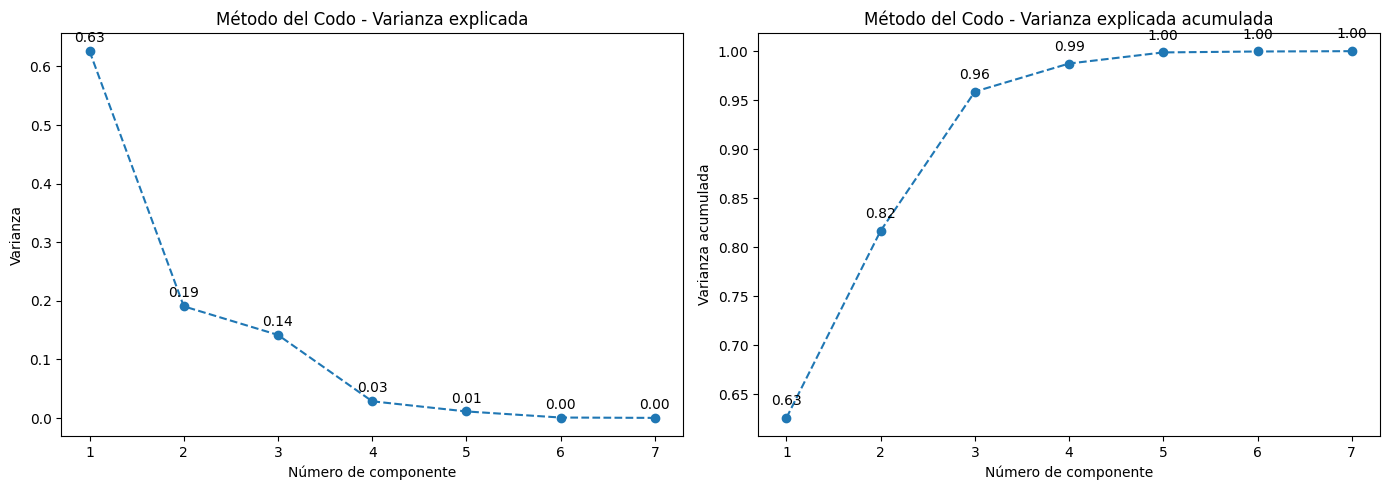

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Primer gráfico: Varianza explicada.
ax[0].plot(range(1, len(varianza_explicada_cov) + 1), varianza_explicada_cov, marker='o', linestyle='--')
ax[0].set_xlabel('Número de componente')
ax[0].set_ylabel('Varianza')
ax[0].set_title('Método del Codo - Varianza explicada')
for i, v in enumerate(varianza_explicada_cov):
    ax[0].text(i + 1, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

# Segundo gráfico: Varianza explicada acumulada.
ax[1].plot(range(1, len(varianza_explicada_acum_cov) + 1), varianza_explicada_acum_cov, marker='o', linestyle='--')
ax[1].set_xlabel('Número de componente')
ax[1].set_ylabel('Varianza acumulada')
ax[1].set_title('Método del Codo - Varianza explicada acumulada')
for i, v in enumerate(varianza_explicada_acum_cov):
    ax[1].text(i + 1, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

##### **2.2. PCA - MATRIZ DE CORRELACIÓN**

##### **2.2.1. VARIANZA (eigenvalues)**

In [13]:
ndf_media = ndf.mean()
ndf_de = ndf.std()
ndf_scaled = ((ndf - ndf_media) / ndf_de)

pca_cor = PCA()
componentes_cor = pca_cor.fit_transform(ndf_scaled)

varianza_cor = pca_cor.explained_variance_
varianza_explicada_cor = pca_cor.explained_variance_ratio_
varianza_explicada_acum_cor = np.cumsum(pca_cor.explained_variance_ratio_)
coeficientes_cor =  pca_cor.components_.T

#Generamos una tabla resumen
data_var_cor = {
    'Varianza (eigenvalues)': varianza_cor,
    'Varianza Explicada': varianza_explicada_cor,
    'Varianza Explicada Acumulada': varianza_explicada_acum_cor
}

variablespca_cor = pd.DataFrame(data_var_cor, index=[f'Componente {i+1}' for i in range(len(varianza_cor))]).reset_index(names='N° de Componente')
variablespca_cor

,N° de Componente,Varianza (eigenvalues),Varianza Explicada,Varianza Explicada Acumulada
0,Componente 1,2.1735,0.3105,0.3105
1,Componente 2,1.7162,0.2452,0.5557
2,Componente 3,1.3338,0.1905,0.7462
3,Componente 4,0.8960,0.1280,0.8742
4,Componente 5,0.5298,0.0757,0.9499
5,Componente 6,0.2262,0.0323,0.9822
6,Componente 7,0.1245,0.0178,1.0000


##### **2.2.2. COEFICIENTES (eigenvectors)**

In [14]:
coeficientespca_cor = pd.DataFrame(coeficientes_cor, columns=[f'Coeficiente (eigenvector) {i+1}' for i in range(coeficientes_cor.shape[1])], index=ndf.columns).reset_index(names='Variable')
coeficientespca_cor

,Variable,Coeficiente (eigenvector) 1,Coeficiente (eigenvector) 2,Coeficiente (eigenvector) 3,Coeficiente (eigenvector) 4,Coeficiente (eigenvector) 5,Coeficiente (eigenvector) 6,Coeficiente (eigenvector) 7
0,Agricultural land,-0.3549,0.4082,-0.4055,-0.2242,0.4675,-0.5048,-0.1388
1,Arable land,-0.4678,0.4219,0.0334,-0.3519,-0.0973,0.6512,0.2114
2,Agricultural raw materials exports,0.3852,0.0762,0.5127,-0.3129,0.6452,0.0444,0.2585
3,Agricultural raw materials imports,-0.0173,0.4622,0.5868,-0.1190,-0.4701,-0.4205,-0.1727
4,"Agriculture, forestry, and fishing, value added",0.5456,0.3133,-0.2479,-0.1807,-0.0170,0.3103,-0.6431
5,Employment in agriculture,0.4495,0.4094,-0.3699,0.0904,-0.2299,-0.1188,0.6468
6,Rural population,-0.0827,0.4125,0.1703,0.8204,0.2855,0.1787,-0.0866


##### **2.2.3. COMPONENTES PRINCIPALES**

In [15]:
componentespca_cor = pd.DataFrame(componentes_cor, columns=[f'Componente {i+1} ' for i in range(componentes_cor.shape[1])], index=df.iloc[:,0]).reset_index()
componentespca_cor

,Country Name,Componente 1,Componente 2,Componente 3,Componente 4,Componente 5,Componente 6,Componente 7
0,Argentina,1.1384,0.0073,-1.5171,-0.9835,-0.4523,0.1920,-0.8570
1,Australia,-0.0137,-1.3198,-0.8034,-0.1355,0.7420,-0.5812,-0.3220
2,Austria,-0.6793,0.4337,1.0262,1.7488,-0.0818,-0.1336,-0.0111
3,Belgium,-1.4955,-1.2323,-0.3109,-1.4516,-0.1802,-0.0420,0.3132
4,Canada,0.7388,-2.1212,0.8035,0.5427,0.0614,0.5658,0.0869
5,Switzerland,-0.8873,-1.3132,-0.6233,1.1186,0.4205,-0.0670,0.1816
6,Chile,2.6753,-1.0488,0.0127,-0.3939,0.5401,0.4322,0.5441
7,Colombia,3.2579,0.9243,-1.8244,-0.0762,0.2287,-0.0387,0.0737
8,Costa Rica,2.1246,0.4846,-1.5284,0.4385,-0.4708,-0.2790,0.6620
9,Czechia,-1.2336,0.1987,-0.2554,0.0877,0.3280,0.6721,-0.0332


##### **2.2.4. VARIANZA EXPLICADA EN TÉRMINOS GRÁFICOS**

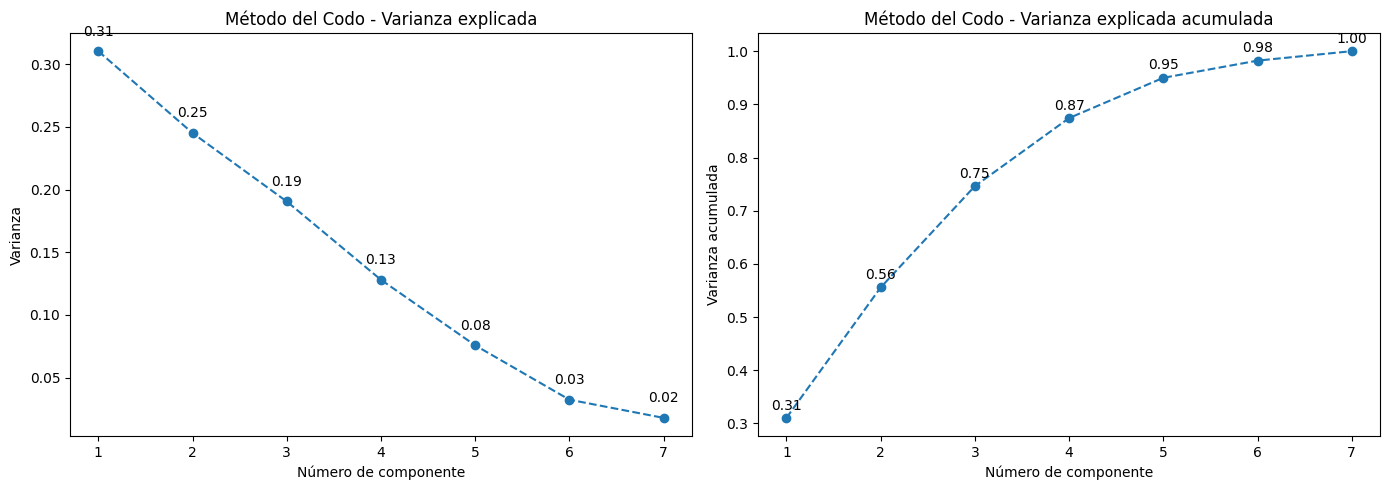

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Primer gráfico: Varianza explicada.
ax[0].plot(range(1, len(varianza_explicada_cor) + 1), varianza_explicada_cor, marker='o', linestyle='--')
ax[0].set_xlabel('Número de componente')
ax[0].set_ylabel('Varianza')
ax[0].set_title('Método del Codo - Varianza explicada')
for i, v in enumerate(varianza_explicada_cor):
    ax[0].text(i + 1, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

# Segundo gráfico: Varianza explicada acumulada.
ax[1].plot(range(1, len(varianza_explicada_acum_cor) + 1), varianza_explicada_acum_cor, marker='o', linestyle='--')
ax[1].set_xlabel('Número de componente')
ax[1].set_ylabel('Varianza acumulada')
ax[1].set_title('Método del Codo - Varianza explicada acumulada')
for i, v in enumerate(varianza_explicada_acum_cor):
    ax[1].text(i + 1, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


##### **2.3. VARIANZA EXPLICADA EN TÉRMINOS GRÁFICOS EN FORMA COMPARATIVA**

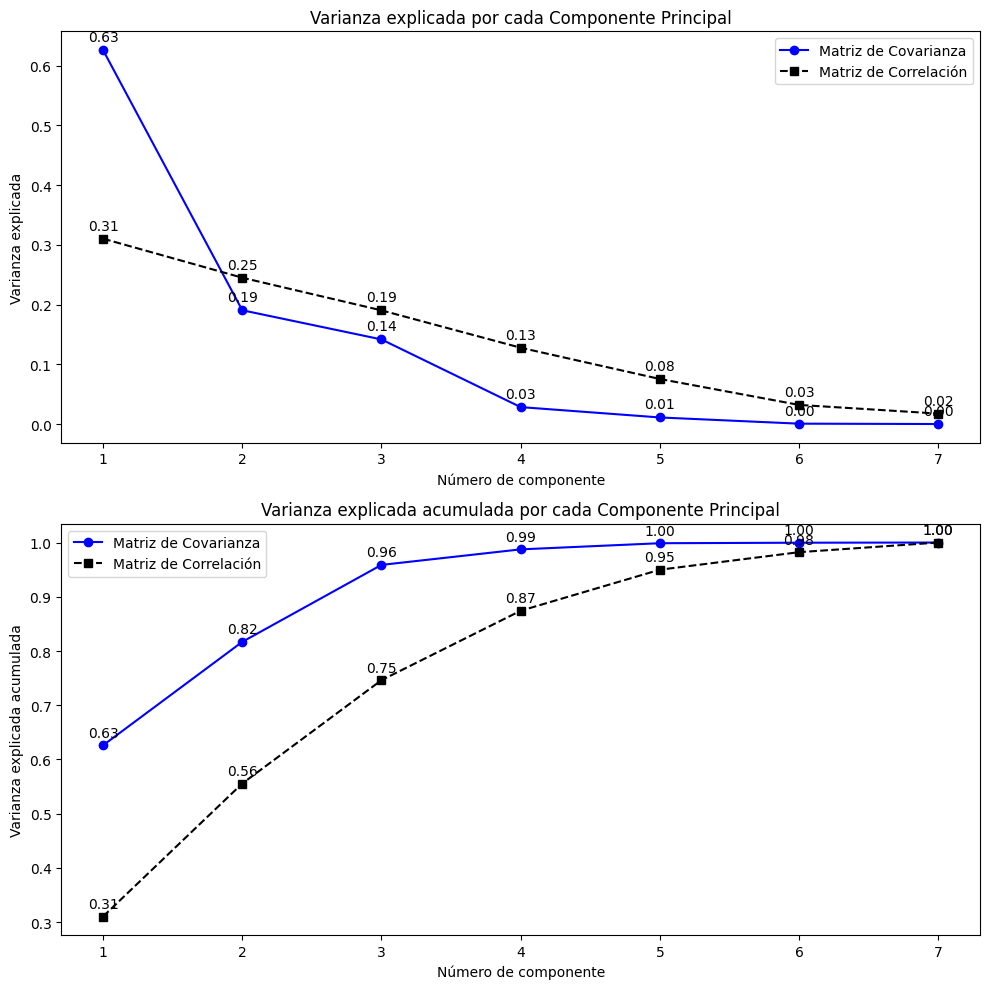

In [17]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Primer gráfico: Varianza explicada (dos líneas: cov y cor).
ax[0].plot(range(1, len(varianza_explicada_cov) + 1), varianza_explicada_cov, marker='o', linestyle='-', color='blue', label='Matriz de Covarianza')
ax[0].plot(range(1, len(varianza_explicada_cor) + 1), varianza_explicada_cor, marker='s', linestyle='--', color='black', label='Matriz de Correlación')
ax[0].set_xlabel('Número de componente')
ax[0].set_ylabel('Varianza explicada')
ax[0].set_title('Varianza explicada por cada Componente Principal')
ax[0].legend()
for i, v in enumerate(varianza_explicada_cov):
    ax[0].text(i + 1, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
for i, v in enumerate(varianza_explicada_cor):
    ax[0].text(i + 1, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

# Segundo gráfico: Varianza explicada acumulada (dos líneas: cov y cor).
ax[1].plot(range(1, len(varianza_explicada_acum_cov) + 1), varianza_explicada_acum_cov, marker='o', linestyle='-', color='blue', label='Matriz de Covarianza')
ax[1].plot(range(1, len(varianza_explicada_acum_cor) + 1), varianza_explicada_acum_cor, marker='s', linestyle='--', color='black', label='Matriz de Correlación')
ax[1].set_xlabel('Número de componente')
ax[1].set_ylabel('Varianza explicada acumulada')
ax[1].set_title('Varianza explicada acumulada por cada Componente Principal')
ax[1].legend()
for i, v in enumerate(varianza_explicada_acum_cov):
    ax[1].text(i + 1, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
for i, v in enumerate(varianza_explicada_acum_cor):
    ax[1].text(i + 1, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Comentarios:**
- Dado el objetivo de reducción de cantidad de variables con la menor pérdida de varianza posible para la matriz de datos analizada, se ha realizado un Análisis de Componentes Principales (PCA) de dos formas distintas, cuyos resultados difieren sensiblemente. 
- Dada la matriz de datos no estandarizada, PCA nos indica que el primer componente explica en un 63% la varianza total de los datos. Sin embargo, dada la matriz de datos estandarizada, PCA nos indica que este mismo guarismo es del 31%. 
- Al presentar la información de varianzas explicadas de forma gráfica y conjunta para ambos análisis de PCA, puede concluirse que las diferencias entre ambos resultados se mantienen: mientras que el primer análisis indicaría que para contar con un nivel de varianza explicada del 95% se requerirían 3 componentes, el segundo análisis concluiría que mismo guarismo podría conseguirse con tan solo 5 componentes. 
- A pesar de que PCA con datos no estandarizados “conservaría” mayor varianza en las primeras componentes, se preferirá trabajar con los resultados de PCA para datos estandarizados (si bien sabemos que las variables están en una misma unidad de medida, preferimos trabajar con datos estandarizados por si pequeñas relaciones de variabilidad entre variables no han sido visualmente percibidas por nosotros, los analistas).


##### **2.4. INTERPRETACIÓN DE LAS DOS PRIMERAS COMPONENTES**

In [ ]:
#Selección de primeras dos componentes.
componentes = componentespca_cor.iloc[:,0:3]
ncomponentes = componentes.iloc[:,1:]
desc_pca = estadisticas_descriptivas(ncomponentes)
desc_pca = desc_pca[desc_pca['Medida'] != 'cv'] #No se contempla cv.
desc_pca

In [20]:
#Correlación entre primeros 2 componentes y variables de matriz de datos.
cor_pca_variables = pd.concat([df.iloc[:, 2:], componentes.iloc[:,1:]], axis=1).corr().iloc[:-2, -2:].reset_index(names='Variable')
cor_pca_variables

,Variable,Componente 1,Componente 2
0,Agricultural land,-0.5233,0.5347
1,Arable land,-0.6897,0.5526
2,Agricultural raw materials exports,0.5678,0.0998
3,Agricultural raw materials imports,-0.0255,0.6056
4,"Agriculture, forestry, and fishing, value added",0.8043,0.4104
5,Employment in agriculture,0.6627,0.5364
6,Rural population,-0.1219,0.5404


**Comentarios:**
- La interpretación de los Componente Principales puede realizarse o bien analizando la matriz de coeficientes (autovectores) provenientes de PCA, o bien al observar la correlación existente entre los componentes y las variables originales, dado que los resultados alcanzados por ambos ofrecen iguales conclusiones.
- Dado que los componentes principales surgen (bajo este modelo PCA) del producto matricial entre la matriz de datos estandarizados y los coeficientes, puede interpretarse lo siguiente:
    - Componente Principal 1: Representaría, en forma conjunta y de forma positiva, un producto ponderado del valor agregado, el empleo y las exportaciones en la agricultura. A su vez, implicaría, de forma negativa, un producto ponderado de la tierra arable y agrícola. En este sentido, es de esperar que países con altos guarismos en el primer grupo y bajos guarismos en el segundo grupo, presenten un alto Componente Principal 1. Ejemplo: Colombia.
    - Componente Principal 2: Representaría, en forma conjunta y de forma positiva, un producto ponderado de todas las variables de la matriz de datos, siendo las importaciones agrícolas la variable que presenta mayor peso en la ponderación, seguidas de tierras arables y agrícolas. Ejemplo: Dinamarca.


In [21]:
#Se aprecia, como es de esperar, que las correlaciones sean las mismas ante la matriz de datos no estandariza (arriba) o estandarizada (aquí).
pd.concat([ndf_scaled.reset_index().iloc[:, 1:], componentes.iloc[:,1:]], axis=1).corr().iloc[:-2, -2:].reset_index(names='Variable')

,Variable,Componente 1,Componente 2
0,Agricultural land,-0.5233,0.5347
1,Arable land,-0.6897,0.5526
2,Agricultural raw materials exports,0.5678,0.0998
3,Agricultural raw materials imports,-0.0255,0.6056
4,"Agriculture, forestry, and fishing, value added",0.8043,0.4104
5,Employment in agriculture,0.6627,0.5364
6,Rural population,-0.1219,0.5404


**Comentarios iniciales:**
Ciertos algoritmos no han sido hallados en librerías de código abierto por lo que se ha requerido de una programación propia, cuyos resultados lograron ser idénticos a los alcanzados por R o Stata. Ejemplos de ello aparecen, especialmente, en: 
- Análisis de Componentes Principales: para la elaboración de gráficos biplot con distintos valores posibles del parámetro c.

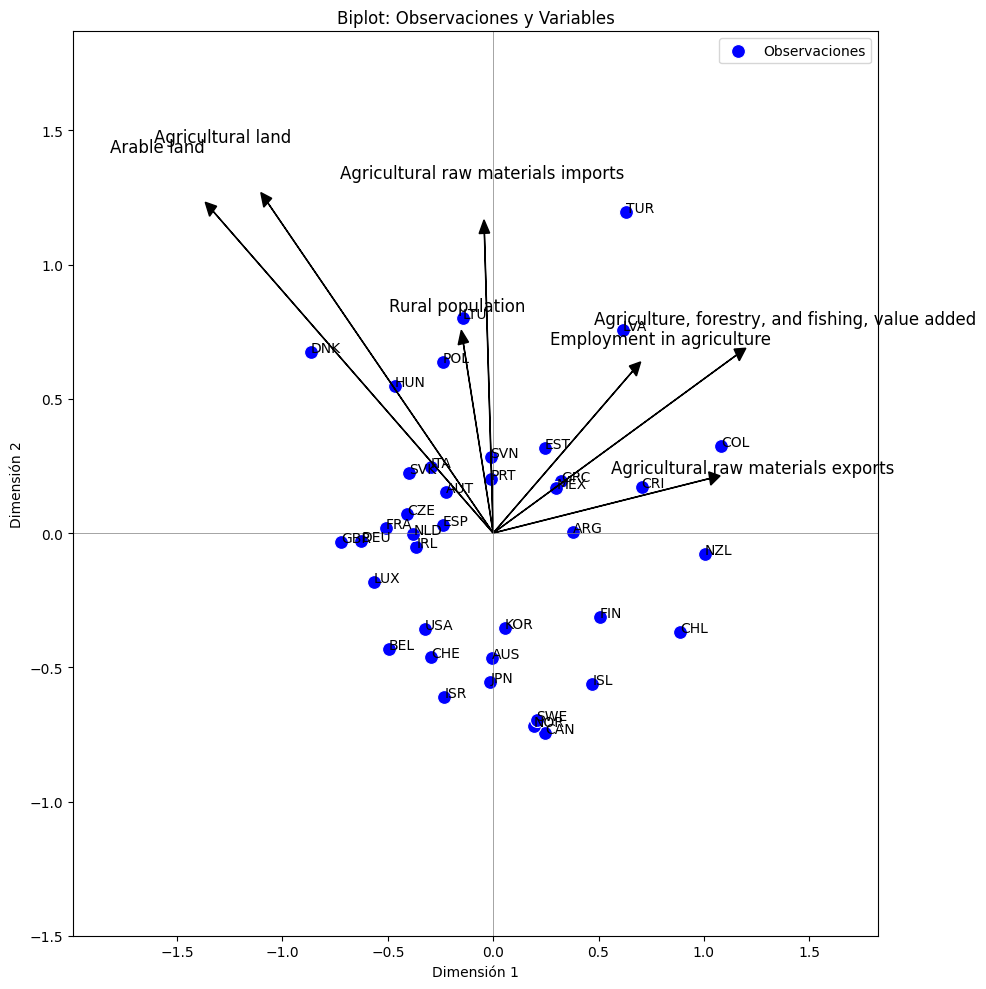

In [22]:
#Datos para gráfico Biplot. Se trbajará con c = 0.5.

ndf_scaled_producto = np.dot(np.transpose(ndf_scaled), ndf_scaled)
autovalores, autovectores = np.linalg.eig(ndf_scaled_producto)

D = pd.DataFrame(np.diag(autovalores))
D_raiz_neg = pd.DataFrame(np.where(D != 0, np.power(D, -1/2),0))
D_cuarta = pd.DataFrame(np.where(D != 0, np.power(D, 1/4),0))

componentes_biplot = np.dot(componentespca_cor.iloc[:,1:], D_raiz_neg)
componentes_biplot = pd.DataFrame(np.dot(componentes_biplot, D_cuarta))

coeficientes_biplot = pd.DataFrame(np.dot(D_cuarta, coeficientespca_cor.iloc[:,1:]))
ndf_x = ndf.copy()
ndf_x.columns = [f"x{i}" for i in range(len(ndf_x.columns))]

#Gráfico Biplot.

fig, ax = plt.subplots(figsize=(10, 10))

# Primer gráfico: scatterplot de las componentes principales (Observaciones).
sns.scatterplot(x=componentes_biplot.iloc[:, 0], y=componentes_biplot.iloc[:, 1], ax=ax, s=100, color='blue', label='Observaciones')
ax.axhline(0, color='gray', lw=0.5)
ax.axvline(0, color='gray', lw=0.5)
ax.set_xlabel('Dimensión 1')
ax.set_ylabel('Dimensión 2')
ax.set_title('Biplot: Observaciones y Variables')

for i, txt in enumerate(df.iloc[:, 1]):
    ax.annotate(txt, (componentes_biplot.iloc[i, 0], componentes_biplot.iloc[i, 1]))

# Segundo gráfico: vectores de los coeficientes (Variables).
for i in range(coeficientes_biplot.shape[0]):
    ax.arrow(0, 0, coeficientes_biplot.iloc[i, 0], coeficientes_biplot.iloc[i, 1],
             color='black', head_width=0.05, head_length=0.05)
    ax.text(coeficientes_biplot.iloc[i, 0]*1.2, coeficientes_biplot.iloc[i, 1]*1.2,
            ndf.columns[i], color='black', ha='center', va='center', fontsize=12)

# Ajustar los límites de los ejes
xlim_min = min(ax.get_xlim()[0], -1) - 0.5
xlim_max = max(ax.get_xlim()[1], 1) + 0.5
ylim_min = min(ax.get_ylim()[0], -1) - 0.5
ylim_max = max(ax.get_ylim()[1], 1) + 0.5
ax.set_xlim(xlim_min, xlim_max)
ax.set_ylim(ylim_min, ylim_max)

# Mostrar el gráfico
plt.tight_layout()
plt.legend()
plt.show()


**Comentarios:**
- Las estadísticas descriptivas de las dos primeras Componentes Principales reflejan que las características de la matriz de datos original han sido preservadas, dado que:
    - Se mantiene la disparidad entre valores máximos y mínimos, dando cuenta de la heterogeneidad entre países. Sin embargo, y dado que la distancia entre la mediana y el promedio es no significativa, las diferencias anteriores (máx. vs. mín.) vendrían dados por unos pocos casos extremos;
    - Ante la estandarización de datos, los componentes poseen ahora promedio prácticamente cero y desvío estándar cercano a uno;
Por último, dado lo anterior y en base a coeficientes de asimetría y kurtosis, podría afirmarse que las variables poseen una distribución ligeramente simétrica hacia la derecha con colas menos alargadas en comparación con las variables originales (es decir, se aproximan a una distribución normal).
- Por otro lado, de la visualización del gráfico biplot, puede destacarse:
    - Nota: para una representación conjunta de observaciones y variables, se optó por un valor de c = 0,5 (consiguiendo un biplot simétricamente escalado);
    - En relación con las variables (autovectores), se confirma visualmente la interpretación de los Componentes Principales, siendo relevantes las variables valor agregado, el empleo, y exportaciones en la agricultura (de forma positiva), y tierra arable y agrícola (de forma negativa) para el Componente 1, y siendo relevantes todas las variables de forma positiva para el Componente 2, con una mayor participación en variables como tierra arable y agrícolas, e importaciones;
    - En relación con las observaciones, puede interpretarse de forma preliminar la distribución de cada país en términos de las dos primeras Componentes Principales. Se reservan comentarios para la sección de Cluster Jerárquico;
    - Por último, y si bien para la representación conjunta (c=0,5) la magnitud de las variables (autovectores) fue alterada, el gráfico confirma de igual manera las relaciones de dependencia entre variables previamente examinadas en la matriz de correlación (representación de orden dos). Por ejemplo, elevada correlación entre Agricultural land y Arable land, baja correlación entre estas dos y Agricultura exports, etc. 


#### **3. ANÁLISIS DE CLUSTERS JERÁRQUICO**

##### **3.1. SELECCIÓN DE MÉTODO DE CLUSTER**

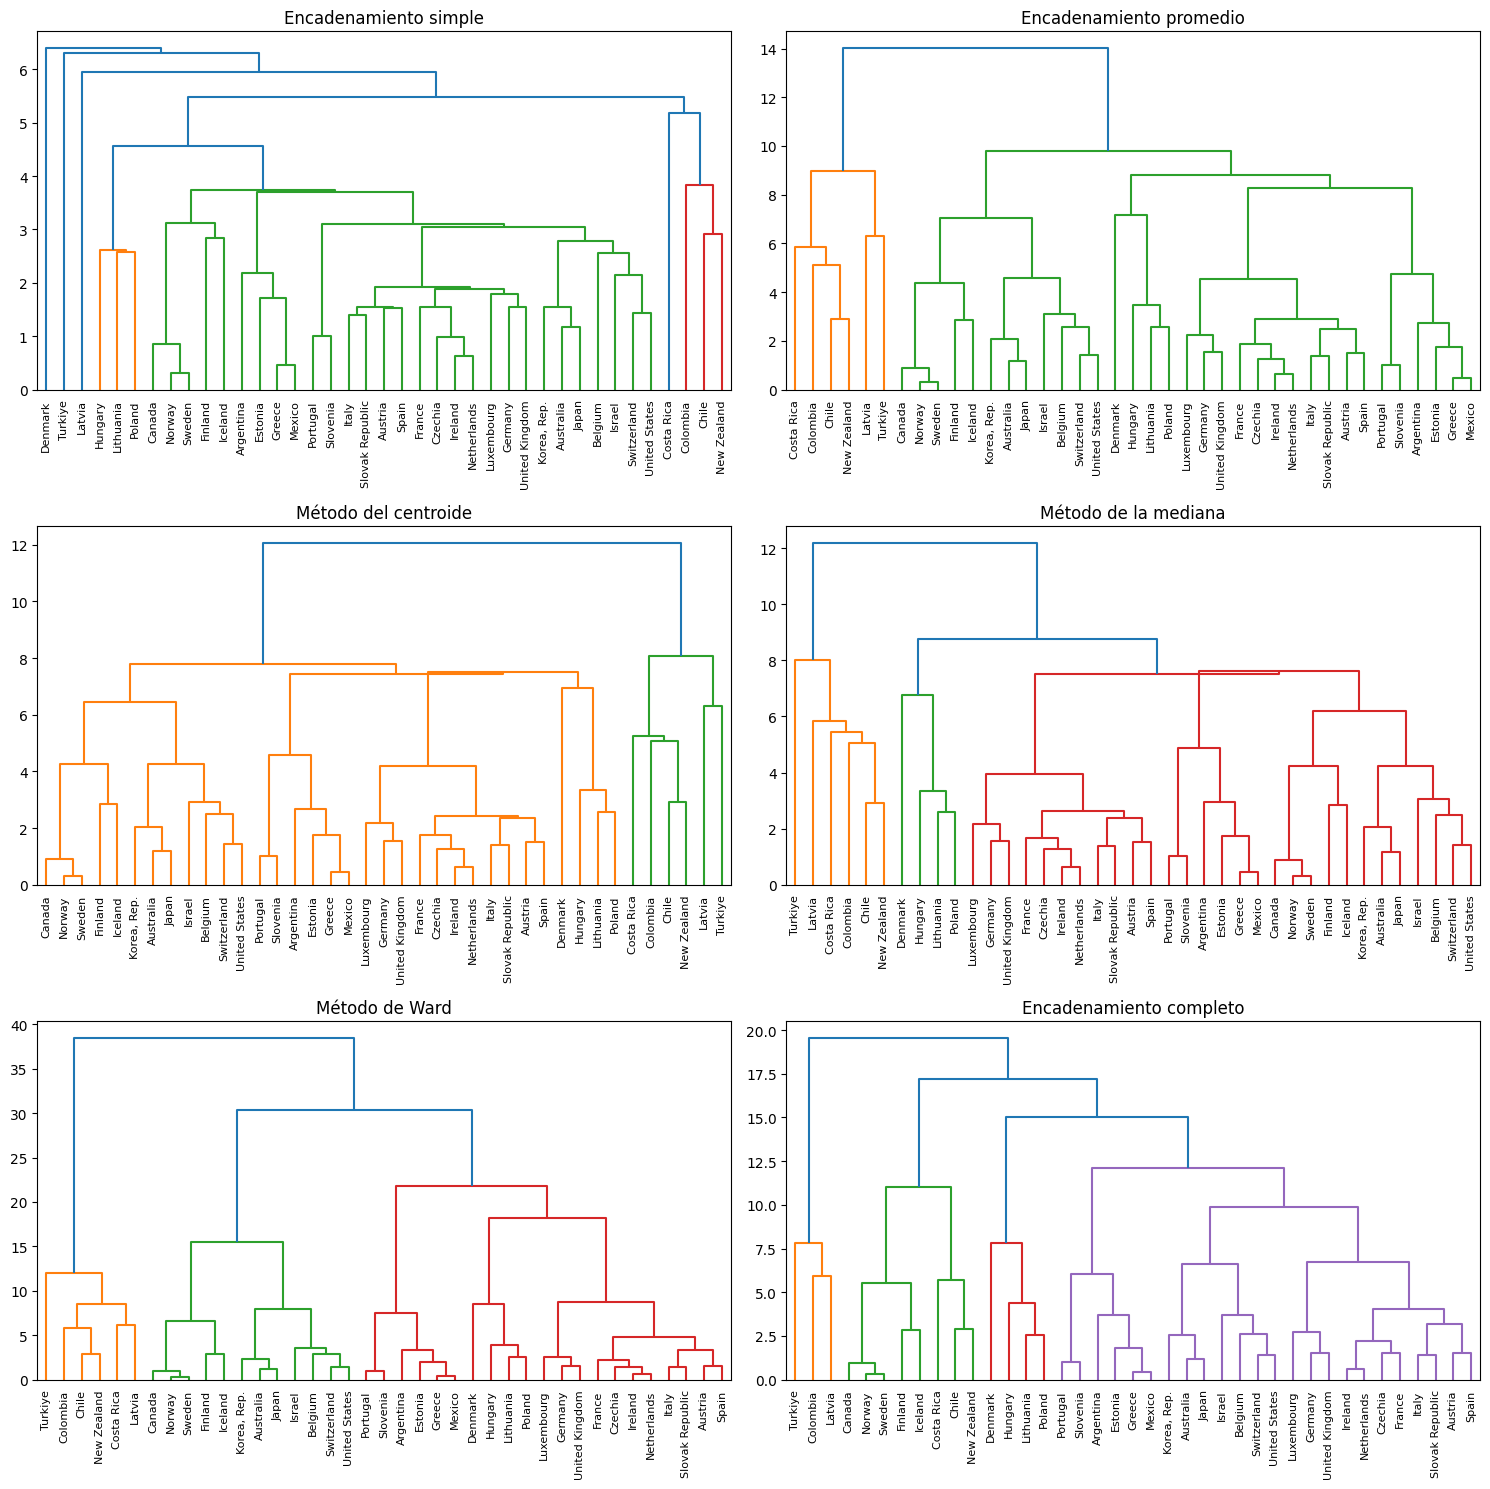

In [24]:
matriz_distancia = pairwise_distances(componentes.iloc[:,1:], metric='euclidean')

#Métodos a analizar.
h_single   = linkage(matriz_distancia, method="single")
h_complete = linkage(matriz_distancia, method="complete")
h_average  = linkage(matriz_distancia, method="average")
h_centroid = linkage(matriz_distancia, method="centroid")
h_median   = linkage(matriz_distancia, method="median")
h_ward     = linkage(matriz_distancia, method="ward")

etiquetas = df['Country Name'].to_list()
plt.rcParams['xtick.labelsize'] = 8

#Gráficos de Clusters según distintos métodos.
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

axs[0, 0].set_title("Encadenamiento simple")
dendrogram(h_single, labels=etiquetas, ax=axs[0, 0], leaf_rotation=90, leaf_font_size=8)

axs[0, 1].set_title("Encadenamiento promedio")
dendrogram(h_average, labels=etiquetas, ax=axs[0, 1], leaf_rotation=90, leaf_font_size=8)

axs[1, 0].set_title("Método del centroide")
dendrogram(h_centroid, labels=etiquetas, ax=axs[1, 0], leaf_rotation=90, leaf_font_size=8)

axs[1, 1].set_title("Método de la mediana")
dendrogram(h_median, labels=etiquetas, ax=axs[1, 1], leaf_rotation=90, leaf_font_size=8)

axs[2, 0].set_title("Método de Ward")
dendrogram(h_ward, labels=etiquetas, ax=axs[2, 0], leaf_rotation=90, leaf_font_size=8)

axs[2, 1].set_title("Encadenamiento completo")
dendrogram(h_complete, labels=etiquetas, ax=axs[2, 1], leaf_rotation=90, leaf_font_size=8)

plt.tight_layout()
plt.show()

**Comentarios osbre métodos no seleccionados:**
**Método de encadenamiento simple**
- Formación de clústeres alargados y dispersos (fenómeno de "chaining“) dado que este método tiende a ser space-contracting;
- Formación de clústeres poco equilibrado dado que en este caso se conforman tres grupos de tres países y uno de treinta;
- Dificultad de interpretación debido a grupos dispersos.

**Método de encadenamiento promedio** 
- No forma clústeres tan compactos ni diferenciados dado que al utilizar el promedio los límites entre los grupos pueden volverse menos claros, lo que dificulta la interpretación visual del dendrograma; 
- Dado que buscamos identificar grupos bien diferenciados este método dificulta la identificación de patrones significativos en el análisis.

**Método del centroide** 
- Al igual que el método de la mediana, por la falta de monotonicidad la representación de los grupos se vuelve poco clara y difícil de interpretar;
- Al presentar “Reversals” (representados en el dendrograma con los crossovers) esto hace que las observaciones tienden a fusionarse rápidamente, lo que puede resultar en clústeres menos diferenciados y más densamente compactados, afectando la claridad del análisis.

**Método de la mediana**
- Método de la mediana carece de monotonicidad generando "crossovers"  en los dendrogramas;
- Esta falta de coherencia en las fusiones de los clústeres dificulta significativamente la interpretación visual del dendrograma, volviéndolo una opción menos adecuada para este análisis.


**Comentarios osbre métodos seleccionados:**
De forma general, la selección del **Método de Ward** responde a:
- Minimiza la varianza interna dentro de los clústeres, lo que garantiza que los países dentro de un mismo grupo sean lo más homogéneos posible;
- Dado lo anterior, tiene una sensibilidad moderada a la presencia de outliers. Esto permite que los grupos homogéneos se formen de manera coherente, incluso cuando hay observaciones muy disímiles. Por ello, Turquía y Letonia se podrían comportar como outliers respecto al resto. Estos países se agrupan más tarde en el proceso, lo que sugiere que sus características agrícolas y rurales son significativamente diferentes a las de los otros países. 

Por su parte, la selección del **encadenamiento completo** se debe a:
- Generación de clústeres separados entre sí, simplificando la identificación de países y manteniendo distancias significativas con otros clústeres (a diferencia de Ward que busca minimizar la varianza interna, lo permite ver dos perspectivas diferentes en la agrupación de los países);
- Mayor sensibilidad ante la presencia de outliers que el método de Ward. Por ejemplo, países como Colombia, Turquía y Dinamarca, que tienen comportamientos atípicos, son agrupados en etapas más tardías del proceso, lo que resalta aún más sus diferencias en comparación con los demás clústeres.


##### **3.2. INTERPRETACIÓN DE CLUSTERS**

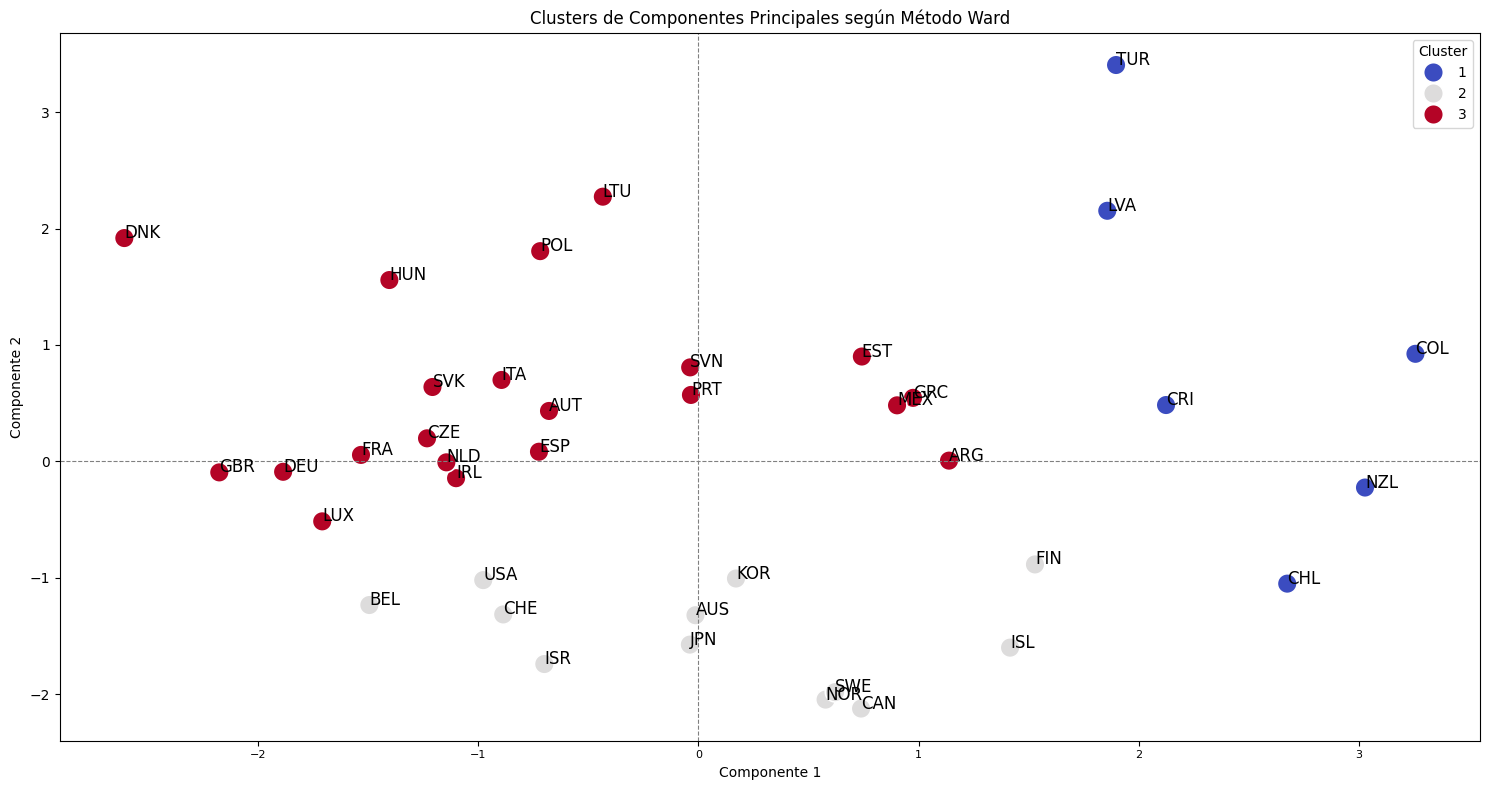

In [25]:
#Para cada cluster se obtedrán las etiquetas.
num_clusters = 3
clusters = fcluster(h_ward, num_clusters, criterion='maxclust')

#Gráfico.
plt.figure(figsize=(15, 8))
plt.title("Clusters de Componentes Principales según Método Ward")

ax = sns.scatterplot(x=componentes.iloc[:, 1], y=componentes.iloc[:, 2], hue=clusters, palette='coolwarm', s=200)

ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)
ax.axvline(0, color='gray', linestyle='--', linewidth=0.8) 

for i, txt in enumerate(df.iloc[:, 1]):
    ax.annotate(txt, (componentes.iloc[i, 1], componentes.iloc[i, 2]), fontsize=12)

plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(title='Cluster')

plt.tight_layout()
plt.show()

**Comentarios:**

Recordar que, las componentes principales poseen la siguiente interpretación:
- Componente Principal 1: Representaría, en forma conjunta y de forma positiva, un producto ponderado del valor agregado, el empleo y las exportaciones en la agricultura. A su vez, implicaría, de forma negativa, un producto ponderado de la tierra arable y agrícola. En este sentido, es de esperar que países con altos guarismos en el primer grupo y bajos guarismos en el segundo grupo, presenten un alto Componente Principal 1. 
- Componente Principal 2: Representaría, en forma conjunta y de forma positiva, un producto ponderado de todas las variables de la matriz de datos, siendo las importaciones agrícolas la variable que presenta mayor peso en la ponderación, seguidas de tierras arables y agrícolas.

Dado esta conceptualización, y en función al reconocimiento de tres clústers según Método de Ward, los mismos pueden ser definidos de la siguiente forma:
- Clúster 1: Lo que los caracteriza como un grupo homogéneo y diferente del resto es que poseen elevados guarismos en componente 1: naciones con alto valor agregado, empleo y exportaciones agrícolas, al tiempo de poseen bajo territorio para estos fines. Se aprecian países como Turquía y Letonia con alto componente 2, a su vez;
- Clúster 2: De forma similar, logran la característica de clúster por medio de presentar guarismos negativos de componente 2: naciones con bajos guarismos en importaciones agrícolas y territorio para dichos fines. A su vez (generalmente), el grupo se divide entre aquellos que presentan guarismos negativos y positivos de componente 1, siendo la diferencia en si presentan o no territorio para dichos fines, respectivamente.() 
- Clúster 3: Presentan, mayoritariamente, guarismos positivos en componente 2 (en general, producto ponderado positivo de todas las variables).


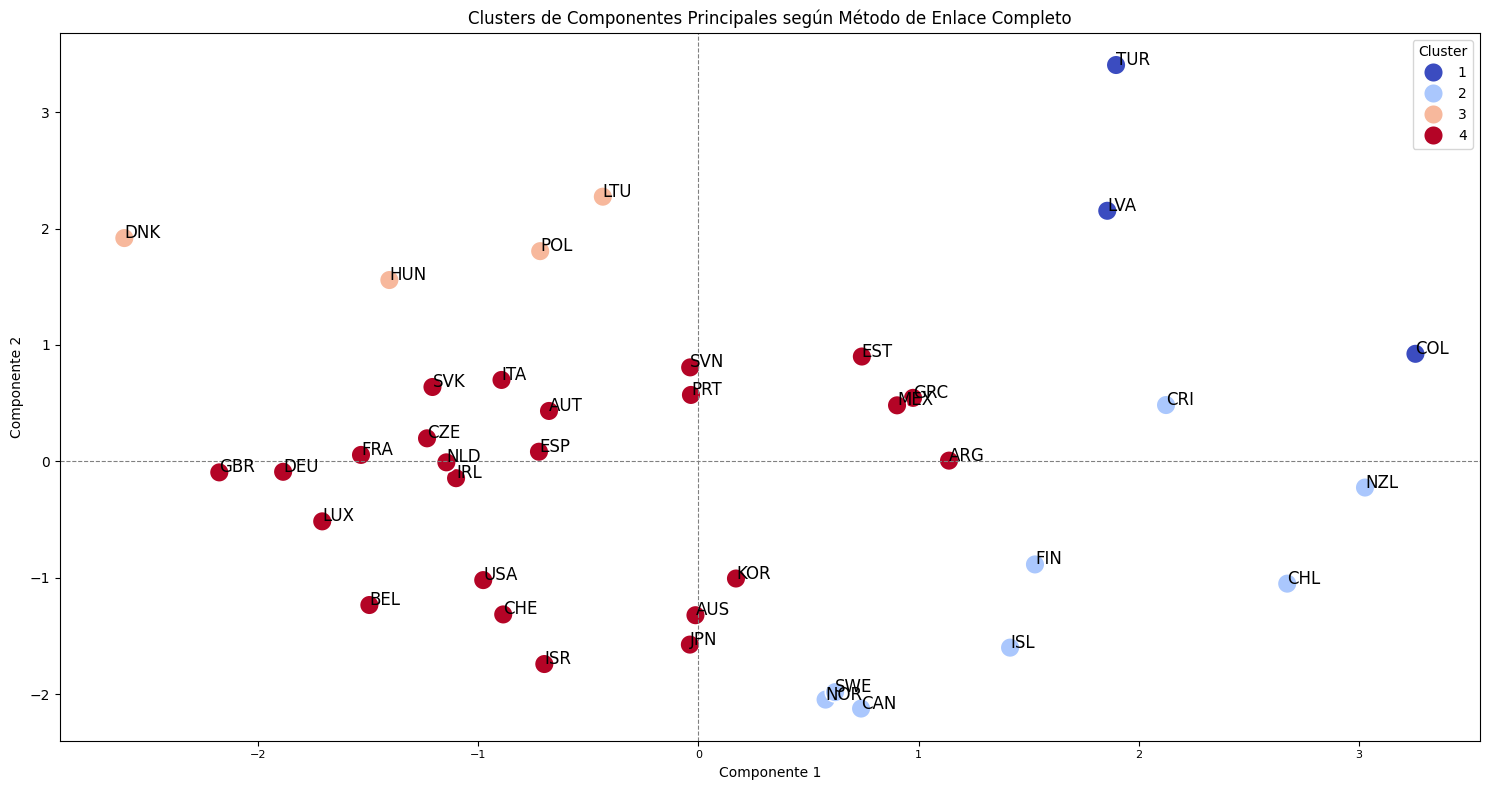

In [26]:
#Para cada cluster se obtedrán las etiquetas.
num_clusters = 4
clusters = fcluster(h_complete, num_clusters, criterion='maxclust')

#Gráfico.
plt.figure(figsize=(15, 8))
plt.title("Clusters de Componentes Principales según Método de Enlace Completo")

ax = sns.scatterplot(x=componentes.iloc[:, 1], y=componentes.iloc[:, 2], hue=clusters, palette='coolwarm', s=200)

ax.axhline(0, color='gray', linestyle='--', linewidth=0.8) 
ax.axvline(0, color='gray', linestyle='--', linewidth=0.8) 

for i, txt in enumerate(df.iloc[:, 1]):
    ax.annotate(txt, (componentes.iloc[i, 1], componentes.iloc[i, 2]), fontsize=12)

plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(title='Cluster')

plt.tight_layout()
plt.show()


**Comentarios:**

En función al reconocimiento de cuatro clústers según el encadenamiento completo, los mismos pueden ser definidos de la siguiente forma:

- Clúster 1: Representa un subgrupo del grupo 1 del método de Ward, por lo que su caracterización se mantiene. Se infiere que el elevado componente 2 de Turquía y Letonia, con al alto componente 1 de Colombia (el mayor entre las observaciones) pesaron para esta división.
- Clúster 2: Representa la unión parcial entre los grupos 1 y 2 (solo aquellas observaciones positivas en componente 1) del anterior método. Se caracterizan por poseer positivos guarismos en componente 1 y negativos en componente 2: no poseen, en general, tierra agrícola;
- Clúster 3: Partición del grupo 3 del método de Ward. Se excluye a Dinamarca, Hungría, Polonia y Lituania del anterior grupo 3 mejorando la heterogeneidad entre los grupos, ya que estos poseen guarismos elevados en componente 2. 
- Clúster 4: Se incorporan aquellos países pertenecientes al grupo 2 del análisis anterior que presentaban guarismos negativos de componente 2. A grandes rasgos, dada la actual configuración, el grupo puede interpretarse como un promedio ponderado de ambos componentes, dada su concentración en torno al origen de coordenadas.

Dado el manejo de posibles outliers (como Turquía y Letonia, por un lado, y de Dinamarca, Hungría, Polonia y Lituania, por otro) en conjunto a la apertura del grupo 2 según método de Ward (aquí grupos 3 y 4) en naciones con o sin (en general) territorio para fines agrícolas, se **considera que el método de encadenamiento completo ofrece mejores resultados en términos de lograr grupos homogéneos dentro de sí  y heterogéneos entre sí**.


#### **4. ANÁLISIS DE FACTORES**

**Comentarios iniciales:**
Ciertos algoritmos no han sido hallados en librerías de código abierto por lo que se ha requerido de una programación propia, cuyos resultados lograron ser idénticos a los alcanzados por R o Stata. Ejemplos de ello aparecen, especialmente, en:
- Análisis de Factores: 
    -  para la elaboración de una función para el **Test Multivariado de Mardia** (en librerías de código abierto como SciPy, Scikit-learn, Pingouin, no presentan test de normalidad multivariado, o cuando lo presentan no es el de Mardia);
    -  para la programación de una clase de varias funciones para la realización de **Análisis de Factores** de acuerdo con el Método de Factores Principales cuyos resultados repliquen los alcanzados por Stata (para el desarrollo de este fue necesaria la lectura de la documentación de Stata en conjunto con los libros de referencia allí ofrecidos, como Rencher y Christensen, 2012 capítulo 13. Librerías de código abierto como FactorAnalyzer, Statsmodel, Scikit-learn, no brindan la posibilidad de aplicar análisis de factores mediante el método de factores principales –sí, por ejemplo, mediante método de máxima verosimilitud–  y, cuando dicen hacerlo, en verdad lo que aplican es el Método de Componentes Princiaples, donde la matriz estimada Psi (Ψ) no es considerada en la estimación de la matriz de varianzas y covarianzas o matriz de correlaciones). 


##### **4.1. PRUBEA DE NORMALIDAD MULTIVARIADA**

In [27]:
def mardia_test(X: np.ndarray, cov: bool = True):
    """
    Prueba de simetría y curtosis multivariada de Mardia.
    Calcula los coeficientes de simetría y curtosis multivariada de Mardia,
    así como sus correspondientes pruebas estadísticas.

    Parámetros:
         X - matriz de datos multivariados;
         cov - booleano para indicar si se normaliza la matriz de covarianza por n (c=1[por defecto]) o por n-1 (c~=1).

    Retorna:
         - coeficiente de simetría;
         - coeficiente de curtoris;
         - estadístico de prueba de simetría;
         - estadístico de prueba de curtosis;
         - valor de significancia para simetría;
         - valor de significancia para curtosis.
    """
    n, p = X.shape

    if cov:
        S = ((n - 1)/n) * np.cov(X.T)
    else:
        S = np.cov(X.T)

    X_mean = X.mean(axis=0)
    
    #Inversa - verificar si la matriz es singular.
    try:
        iS = np.linalg.inv(S)
    except Exception as e:
        print(e)
        return 0.0, 0.0, 0.0, 0.0
    
    #Matriz de distancias de Mahalanobis al cuadrado.
    D: np.ndarray = (X - X_mean) @ iS @ (X - X_mean).T
    
    #Coeficiente de simetría multivariada.
    msc: float = np.sum(D**3)/n**2
    #Coeficiente de curtosis multivariada.
    mkc: float = np.trace(D**2)/n

    #Grados de libertad.
    df: float = (p * (p + 1) * (p + 2))/6

    #Estadístico de simetría: se aproxima a una distribución Chi-cuadrado.
    g_skew = ((p + 1)*(n + 1)*(n + 3))/(6*(((n + 1)*(p + 1)) - 6)) * msc 
    #Valor de significancia asociado a la simetría.
    p_skew: float = 1.0 - stats.chi2.cdf(g_skew, df)

    #Estadístico de curtosis: se aproxima a una distribución normal estándar.
    g_kurt = (mkc - (p*(p + 2)))/(np.sqrt((8 * p * (p + 2))/n))
    #Valor de significancia asociado a la curtosis.
    p_kurt: float = 2 * (1.0 - stats.norm.cdf(np.abs(g_kurt)))

    X = {
        "Término": ["Coeficiente de Simetría", "Coeficiente de Curtosis"],
        "Coeficiente": [msc, mkc],
        "Estadístico": [g_skew, g_kurt],
        "P-valor": [p_skew, p_kurt]
    }
    df = pd.DataFrame(X)

    #Mostrar tabla formateada usando tabulate.
    print(tabulate(df, headers='keys', tablefmt="fancy_grid", showindex=False, floatfmt=".4f"))

In [28]:
#Se efectúa Test Multivariado de Mardia sobre nuestra matriz de datos original.
mardia_test(ndf.values)

╒═════════════════════════╤═══════════════╤═══════════════╤═══════════╕
│ Término                 │   Coeficiente │   Estadístico │   P-valor │
╞═════════════════════════╪═══════════════╪═══════════════╪═══════════╡
│ Coeficiente de Simetría │       22.9811 │      163.9415 │    0.0000 │
├─────────────────────────┼───────────────┼───────────────┼───────────┤
│ Coeficiente de Curtosis │       65.9324 │        0.8157 │    0.4147 │
╘═════════════════════════╧═══════════════╧═══════════════╧═══════════╛


##### **4.2. SELECCIÓN DEL MÉTODO**

Nota: Si bien se rechazaría la hipótesis nula de normalidad de datos multivariados según **Simetría de Mardia** (p-value igual a cero), dicha conclusión no se mantendría según **Kurtosis de Mardia**. Sin embargo, y a pesar de no existir una definición exhaustiva por parte de la hipótesis de no normalidad de datos multivariados, se efectuará análisis según **Método de Factores Principales.**

In [52]:
class FA():
    """
    Clase para análisis exploratorio de los Factores de una matriz de datos mediante método de Factores Principales.

    Esta clase:
        (1) Entrena un modelo de análisis factorial mediante el Método de Factores Principales ("Principal Factor Method"), según se define en Rencher (2002, chap. 13);
        (2) Devuelve: eigenvalues, eigenvectors, loading matrix, communalities, uniquenesses, correlation matrix;
        (3) Permite al generación de una rotación de las cargas ("orthogonal varimax rotation").

    Parámetros
    ----------
    X : np.ndarray
        Matriz de datos.
    n_factors : int, opcional
        Número de factores a extraer.
        Default es None.
    svd_method : {'randomized', 'np.svd'}
        Método para la realización de la descomposicón en valores singulares ("Singular Value Decomposition").
        Default es 'randomized', de librería scikit-learn. Para cualquier otra opción, SVD será realizada desde numpy.

    Atributos
    ---------
    get_eig: :obj:`numpy.ndarray`
        Matrices de autovalores y autovectores.
    get_loadings: :obj:`numpy.ndarray`
        Matriz de cargas.
    get_communalities_uniquenesses: :obj:`numpy.ndarray`
        Mtrices de comunalidades y unicidades.
    get_fa: :obj: personalizado
        Salida similiar a STATA.
    get_comparative_corr_matrix: :obj: personalizado
        Comparación para la matriz de correlaciones (estimada vs. original).
    get_rotated_loadings: :obj:`numpy.ndarray`
        Cargas rotadas. Permite ajuste Kaiser (None por Default).

    Dependencias
    ------------
    import numpy as np
    import pandas as pd
    from sklearn.utils.extmath import randomized_svd
    from tabulate import tabulate

    """
    def __init__(self, X, n_factors=None, svd_method="randomized"):
        self.X = X
        self.n_factors = n_factors
        self.svd_method = svd_method

    def get_eig(self):
        """ 
        Retorna los autovalores y autovectores de la matriz de correlación corregida según Método de Factores Principales,
        de acuerdo al método de SVD seleccionado. 
        """ 

        self.X_corr = np.corrcoef(self.X, rowvar=False)
        self.X_corr_inv = np.linalg.inv(self.X_corr)
        self.X_corr_inv_diag = np.diag(self.X_corr_inv)
        self.R = 1 - (1 / self.X_corr_inv_diag)
        self.X_corr_o = self.X_corr.copy()
        np.fill_diagonal(self.X_corr, self.R)
        self.eigenvalues, _ = np.linalg.eig(self.X_corr) #Para conocer los autovalores negativos
        if self.svd_method == "randomized_svd":
            self.eigenvectors, self.eigenvalues_p, _ = randomized_svd(self.X_corr, n_components=self.X_corr.shape[1], random_state=1234567890)
        else:
            self.eigenvectors, self.eigenvalues_p, _ = np.linalg.svd(self.X_corr, full_matrices=False)

        return self.eigenvalues, self.eigenvectors

    def get_loadings(self):
        """ 
        Retorna las cargas de los Factores, conservando solo aquellas cargas cuyos autovalores sean positivos.
        """  

        self.get_eig()

        self.loadings = self.eigenvectors * np.sqrt(self.eigenvalues_p)
        positive_filter = np.array([i for i, value in enumerate(np.round(self.eigenvalues_p, decimals=10)) if value in np.round(self.eigenvalues, decimals=10)])
        self.positive_loadings = self.loadings[:, positive_filter]

        if self.n_factors == None:
            self.positive_loadings
        else:
            self.positive_loadings = self.positive_loadings[:, :self.n_factors]

        return self.positive_loadings
    
    def get_communalities_uniquenesses(self):
        """ 
        Retorna las comunalidades y unicidades de los Factores.
        """ 

        self.get_loadings()
        self.communalities, self.uniquenesses = np.sum((self.positive_loadings**2), axis=1), 1 - np.sum((self.positive_loadings**2), axis=1)

        return self.communalities, self.uniquenesses
        
    
    def get_fa(self):
        """
        Retorna un resumen detallado de análisis factorial, replicando salida de STATA.
        """      

        self.get_communalities_uniquenesses()                 
        loadings_matrix = pd.DataFrame(self.positive_loadings, columns=[f"Factor {i+1}" for i in range(self.positive_loadings.shape[1])], index=[f"x{i+1}" for i in range(self.positive_loadings.shape[0])]).reset_index(names='Variable')
        loadings_matrix = pd.concat([loadings_matrix, pd.DataFrame(self.uniquenesses, columns=['Uniqueness']), pd.DataFrame(self.communalities, columns=['Communality'])], axis=1)
        eigenv_matrix = pd.DataFrame(np.sort(self.eigenvalues)[::-1], columns=['Eigenvalue'], index=[f"Factor {i+1}" for i in range(self.eigenvalues.shape[0])]).reset_index(names='Factor')
        eigenv_proportion = [np.sort(self.eigenvalues)[::-1][i] / np.sum(np.sort(self.eigenvalues)[::-1]) for i in range(len(self.eigenvalues))]
        eigenv_proportion_cs = np.cumsum(eigenv_proportion)
        eigenv_matrix = pd.concat([eigenv_matrix, pd.DataFrame(eigenv_proportion, columns=['Proportion']), pd.DataFrame(eigenv_proportion_cs, columns=['Cumulative'])], axis=1)

        eigenv_table = tabulate(eigenv_matrix, headers='keys', tablefmt="fancy_grid", showindex=False, floatfmt=".4f")
        loadings_table = tabulate(loadings_matrix, headers='keys', tablefmt="fancy_grid", showindex=False, floatfmt=".4f")

        eigenv_lines = eigenv_table.splitlines()
        loadings_lines = loadings_table.splitlines()

        max_lines = max(len(eigenv_lines), len(loadings_lines))
        eigenv_lines += [''] * (max_lines - len(eigenv_lines))
        loadings_lines += [''] * (max_lines - len(loadings_lines))

        combined_output = "\n".join(f"{eigenv: <40}   {loading}" for eigenv, loading in zip(eigenv_lines, loadings_lines))
        
        print("Resultados de Factor Analysis")
        print(combined_output)
    
    def get_comparative_corr_matrix(self):
        """
        Retorna una comparación de la matriz de correlaciones (estimada por el modelo factorial vs. original).
        """
        self.get_communalities_uniquenesses()
        estimated_corr = self.positive_loadings @ self.positive_loadings.T + np.diag(self.uniquenesses)
        estimated_corr_matrix = pd.DataFrame(estimated_corr, columns=[f"x{i+1}" for i in range(estimated_corr.shape[1])], index=[f"x{i+1}" for i in range(estimated_corr.shape[0])]).reset_index(names='Variables')
        corr = self.X_corr_o
        dif_corr_matrix = pd.DataFrame((estimated_corr - corr), columns=[f"x{i+1}" for i in range(corr.shape[1])], index=[f"x{i+1}" for i in range(corr.shape[0])]).reset_index(names='Variables')

        est_corr_table = tabulate(estimated_corr_matrix, headers='keys', tablefmt="fancy_grid", showindex=False, floatfmt=".4f")
        corr_table = tabulate(dif_corr_matrix, headers='keys', tablefmt="fancy_grid", showindex=False, floatfmt=".4f")

        est_corr_lines = est_corr_table.splitlines()
        corr_lines = corr_table.splitlines()

        max_lines = max(len(est_corr_lines), len(corr_lines))
        est_corr_lines += [''] * (max_lines - len(est_corr_lines))
        corr_lines += [''] * (max_lines - len(corr_lines))

        combined_output = "\n".join(f"{eigenv: <40}   {loading}" for eigenv, loading in zip(est_corr_lines, corr_lines))
     

        print("Matriz de correlación estimada (izquierda). Matriz de diferencias entre Matriz correlación estimada vs. Matriz correlación real (derecha)")
        print(combined_output)
        

    def get_rotated_loadings(self, kaiser=False):
        """
        Retorna la cargas rotadas del modelo factorial (orthogonal varimax rotation").
        Permite aplicar adecuación Kaiser.
        """
        self.get_communalities_uniquenesses()
        X = self.positive_loadings.copy()
        n_rows, n_cols = X.shape
        if n_cols < 2:
            return X
      
        if kaiser:
            normalized_mtx = np.apply_along_axis(
                lambda x: np.sqrt(np.sum(x**2)), 1, X.copy()
            )
            X = (X.T / normalized_mtx).T

        rotation_mtx = np.eye(n_cols)

        d = 0
        for _ in range(5000):
            old_d = d

            basis = np.dot(X, rotation_mtx)

            diagonal = np.diag(np.squeeze(np.repeat(1, n_rows).dot(basis**2)))
            transformed = X.T.dot(basis**3 - basis.dot(diagonal) / n_rows)

            U, S, V = np.linalg.svd(transformed)

            rotation_mtx = np.dot(U, V)
            d = np.sum(S)

            if d < old_d * (1 + 1e-5):
                break

        X = np.dot(X, rotation_mtx)

        if kaiser:
            X = X.T * normalized_mtx
        else:
            X = X.T

        self.rotated_loadings = X.T.copy()
        return self.rotated_loadings
    
    def get_factors(self):
        """
        Retorna los factores.
        """
        self.get_communalities_uniquenesses()
        L = self.positive_loadings.copy()
        sigma = self.X_corr_o.copy()
        sigma_inv = np.linalg.inv(sigma)
        factors = (L.T@sigma_inv)@ndf_scaled.T
        
        return factors.T

    def get_rotated_factors(self):
        """
        Retorna los factores rotados.
        """
        self.get_communalities_uniquenesses()
        self.get_rotated_loadings()
        L = self.rotated_loadings.copy()
        sigma = self.X_corr_o.copy()
        sigma_inv = np.linalg.inv(sigma)
        rotated_factors = (L.T@sigma_inv)@ndf_scaled.T
        
        return rotated_factors.T        

##### **4.3. APLICACIÓN DEL MÉTODO: MODELO DE UN FACTOR**

In [45]:
#Se efectúa Análisis de Factores según Método de Factores Principales para un solo Factor.
#Se inicializa la clase.
fa = FA(ndf.values, n_factors=1)

#Se obtiene un resumen del método.
fa_1_resumen = fa.get_fa()
fa_1_resumen

Resultados de Factor Analysis
╒══════════╤══════════════╤══════════════╤══════════════╕   ╒════════════╤════════════╤══════════════╤═══════════════╕
│ Factor   │   Eigenvalue │   Proportion │   Cumulative │   │ Variable   │   Factor 1 │   Uniqueness │   Communality │
╞══════════╪══════════════╪══════════════╪══════════════╡   ╞════════════╪════════════╪══════════════╪═══════════════╡
│ Factor 1 │       1.8282 │       0.4982 │       0.4982 │   │ x1         │    -0.3620 │       0.8689 │        0.1311 │
├──────────┼──────────────┼──────────────┼──────────────┤   ├────────────┼────────────┼──────────────┼───────────────┤
│ Factor 2 │       1.2632 │       0.3442 │       0.8424 │   │ x2         │    -0.5573 │       0.6894 │        0.3106 │
├──────────┼──────────────┼──────────────┼──────────────┤   ├────────────┼────────────┼──────────────┼───────────────┤
│ Factor 3 │       0.8155 │       0.2222 │       1.0646 │   │ x3         │     0.4277 │       0.8170 │        0.1830 │
├──────────┼──────

In [46]:
#Se obtiene la matriz de correlaciones estimada y la matriz de correlaciones origial 
#(dado que el Método trabjado con datos estandarizado, no se obtendrá la Matriz de varianzas y covarianzas).
fa_1_corr = fa.get_comparative_corr_matrix()

Matriz de correlación estimada (izquierda). Matriz de correlación de diferencias entre estimada vs. real (derecha)
╒═════════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╕   ╒═════════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╕
│ Variables   │      x1 │      x2 │      x3 │      x4 │      x5 │      x6 │      x7 │   │ Variables   │      x1 │      x2 │      x3 │      x4 │      x5 │      x6 │      x7 │
╞═════════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╡   ╞═════════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╡
│ x1          │  1.0000 │  0.2017 │ -0.1548 │  0.0006 │ -0.3000 │ -0.2596 │  0.0182 │   │ x1          │  0.0000 │ -0.4052 │  0.1530 │  0.0223 │ -0.2405 │ -0.3270 │ -0.1294 │
├─────────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤   ├─────────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ x2          │

**Comentarios:**

Nota: Antes de efectuar el Análisis de Factores, fue realizado un Test de Hipótesis de Normalidad Multivariada de Mardia. De acuerdo con los resultados de este (que pueden ser encontrados en archivo .ipynb), si bien se rechazaría la hipótesis nula según Simetría de Mardia (p-value igual a cero), dicha conclusión no se mantendría según Kurtosis de Mardia. Sin embargo, y a pesar de no existir una definición exhaustiva por parte de la hipótesis de no normalidad de datos multivariados, se efectuará análisis según Método de Factores Principales.

Del Análisis de Factores, de acuerdo con el método de factores principales, para el primer factor, puede destacarse:
El mismo conservaría aproximadamente el 50% de la varianza total de la matriz de datos;
Analizando el primer vector de coeficientes (loadings), puede resaltarse guarismos positivos para valor agregado y empleo en Agricultura, siendo el resto guarismo negativos;
En relación con la bondad de ajuste del modelo de análisis de factores (cuán bien reconstruyen los factores a las variables), puede argumentarse que el mismo sería deficiente dados los altos niveles de variabilidad específica o uniqueness (no asociados a los factores) presentes en la mayoría de las variables.

Nota: Para el presenta análisis, dado que el Método de Factores Principales trabaja por defecto con datos estandarizados, no se considerará la Matriz de Varianzas y Covarianzas, por lo que se efectúa la estimación de la Matriz de Correlaciones. 

Otra manera de analizar la bondad de ajuste del modelo de análisis factorial es examinar cuan bien replica las varianzas y covarianzas (correlaciones, por ser datos estandarizados) de la matriz de datos original. De este modo, se presenta la estimación de la matriz, por un lado, y la matriz de diferencias presentes en la estimación, por otro.

De acuerdo con la segunda matriz, se observa diferencias significativas (por exceso o defecto) en correlación entre Agricultural land y Arable land, Arable land y Agricultural imports, Agricultural land y Employment, etc. Esto daría cuenta de un deficiente ajuste del modelo.


##### **4.4. APLICACIÓN DEL MÉTODO: MODELO DE DOS FACTORES**

In [47]:
#Se efectúa Análisis de Factores según Método de Factores Principales para dos solo Factor.
#Se inicializa la clase.
fa2 = FA(ndf.values, n_factors=2)

#Se obtiene un resumen del método.
fa_2_resumen = fa2.get_fa()
fa_2_resumen

Resultados de Factor Analysis
╒══════════╤══════════════╤══════════════╤══════════════╕   ╒════════════╤════════════╤════════════╤══════════════╤═══════════════╕
│ Factor   │   Eigenvalue │   Proportion │   Cumulative │   │ Variable   │   Factor 1 │   Factor 2 │   Uniqueness │   Communality │
╞══════════╪══════════════╪══════════════╪══════════════╡   ╞════════════╪════════════╪════════════╪══════════════╪═══════════════╡
│ Factor 1 │       1.8282 │       0.4982 │       0.4982 │   │ x1         │    -0.3620 │    -0.5729 │       0.5407 │        0.4593 │
├──────────┼──────────────┼──────────────┼──────────────┤   ├────────────┼────────────┼────────────┼──────────────┼───────────────┤
│ Factor 2 │       1.2632 │       0.3442 │       0.8424 │   │ x2         │    -0.5573 │    -0.6024 │       0.3265 │        0.6735 │
├──────────┼──────────────┼──────────────┼──────────────┤   ├────────────┼────────────┼────────────┼──────────────┼───────────────┤
│ Factor 3 │       0.8155 │       0.2222 │    

In [48]:
#Se obtiene la matriz de correlaciones estimada y la matriz de correlaciones origial 
#(dado que el Método trabjado con datos estandarizado, no se obtendrá la Matriz de varianzas y covarianzas).
fa_2_corr = fa2.get_comparative_corr_matrix()

Matriz de correlación estimada (izquierda). Matriz de correlación de diferencias entre estimada vs. real (derecha)
╒═════════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╕   ╒═════════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╕
│ Variables   │      x1 │      x2 │      x3 │      x4 │      x5 │      x6 │      x7 │   │ Variables   │      x1 │      x2 │      x3 │      x4 │      x5 │      x6 │      x7 │
╞═════════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╡   ╞═════════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╡
│ x1          │  1.0000 │  0.5469 │ -0.1880 │  0.2334 │ -0.1212 │  0.0007 │  0.1992 │   │ x1          │  0.0000 │ -0.0600 │  0.1199 │  0.2551 │ -0.0617 │ -0.0668 │  0.0516 │
├─────────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤   ├─────────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ x2          │

**Comentarios:**

Nota: Por idénticas razones, se efectúa análisis según Método de Factores Principales.

De la incorporación de un segundo factor al Análisis de Factores, puede destacarse:
Se produce un incremento de varianza explicada del 34%. Se conservaría, de este modo, aproximadamente el 84% de la varianza total de la matriz de datos;
Analizando el segundo vector de coeficientes (loadings), pueden resaltarse guarismos negativos  en prácticamente todas las variables. Debe notarse aquí que Stata arriba a iguales guarismos, pero de signo contrario. Esto puede explicarse (consideramos) por una diferencia en el método SVD (singular value descomposition) empleado. Para garantizar resultados, los interpretaremos con su signo inverso (es el caso de slide 19);
En relación con la bondad de ajuste del modelo, los niveles de variabilidad específica o uniqueness (no asociados a los factores) disminuyeron en relación con el modelo de un solo factor contemplado anteriormente, lo que daría cuenta de un incremento de performance del modelo.

Nota: Por idénticas razones, se efectúa la estimación de la Matriz de Correlaciones. 

De acuerdo con la segunda matriz, se observa diferencias significativas solo en dos correlaciones (por exceso o defecto): en correlación entre Agricultural exports y Agricultural imports, y entre Agricultural land y Agricultural imports. La disminución de diferencias significativas daría cuenta de una mejora en ajuste del modelo.

##### **4.5. COMPARATIVA: PCA vs. ANÁLISIS DE FACTORES**

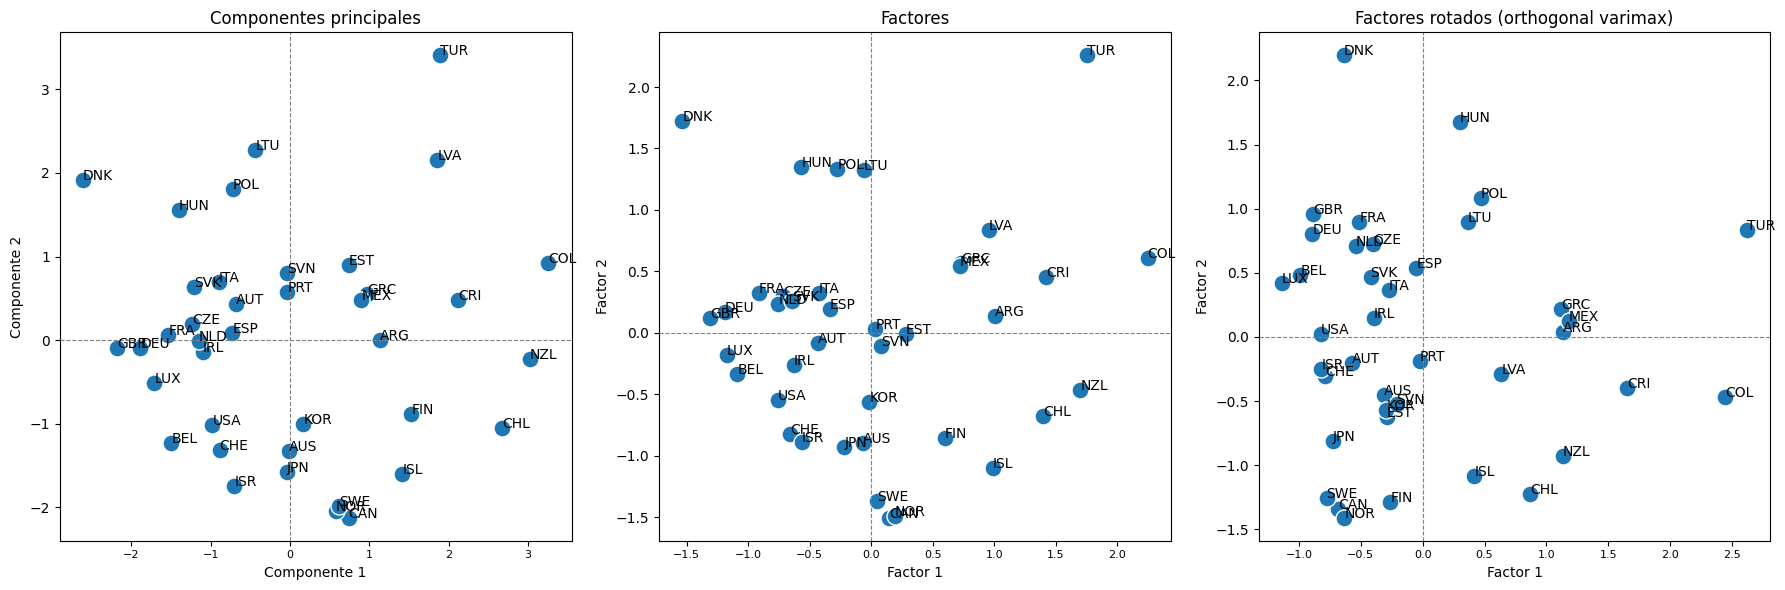

In [67]:
# Crear los subplots para los tres gráficos, distribuidos horizontalmente.
fig, axes = plt.subplots(ncols=3, figsize=(18, 6))

# Gráfico 1: Componentes Principales.
ax1 = sns.scatterplot(x=componentes.iloc[:, 1], y=componentes.iloc[:, 2], s=150, ax=axes[0])
ax1.axhline(0, color='gray', linestyle='--', linewidth=0.8) 
ax1.axvline(0, color='gray', linestyle='--', linewidth=0.8) 
for i, txt in enumerate(df.iloc[:, 1]):
    ax1.annotate(txt, (componentes.iloc[i, 1], componentes.iloc[i, 2]), fontsize=10)
ax1.set_xlabel('Componente 1')
ax1.set_ylabel('Componente 2')
ax1.set_title('Componentes principales')

# Gráfico 2: Factores.
fa3 = FA(ndf.values)
factors = fa3.get_factors()
ax2 = sns.scatterplot(x=factors.iloc[:, 0], y=factors.iloc[:, 1] * -1, s=150, ax=axes[1])
ax2.axhline(0, color='gray', linestyle='--', linewidth=0.8) 
ax2.axvline(0, color='gray', linestyle='--', linewidth=0.8) 
for i, txt in enumerate(df.iloc[:, 1]):
    ax2.annotate(txt, (factors.iloc[i, 0], factors.iloc[i, 1] * -1), fontsize=10)
ax2.set_xlabel('Factor 1')
ax2.set_ylabel('Factor 2')
ax2.set_title('Factores')

# Gráfico 3: Factores rotados.
rotated_factors = fa3.get_rotated_factors()
ax3 = sns.scatterplot(x=rotated_factors.iloc[:, 0], y=rotated_factors.iloc[:, 1] * -1, s=150, ax=axes[2])
ax3.axhline(0, color='gray', linestyle='--', linewidth=0.8) 
ax3.axvline(0, color='gray', linestyle='--', linewidth=0.8) 
for i, txt in enumerate(df.iloc[:, 1]):
    ax3.annotate(txt, (rotated_factors.iloc[i, 0], rotated_factors.iloc[i, 1] * -1), fontsize=10)
ax3.set_xlabel('Factor 1')
ax3.set_ylabel('Factor 2')
ax3.set_title('Factores rotados (orthogonal varimax)')

plt.tight_layout()
plt.show()

**Comentarios:**
- De forma general, se entiende por PCA y Análisis de Factores a dos posibles técnicas de reducción de dimensionalidad de una matriz de datos, al tiempo intentar preservar la mayor cantidad posible de las características intrínsecas propias de dicha matriz. PCA, por su parte, intentará realocar la varianza (entendida esta como las características intrínsecas de la matriz de datos) en unos pocos componentes principales; Análisis Factorial, por su parte, intentará la reconstrucción de las variables a partir de una combinación lineal de variables artificiales, permitiendo en dicho proceso explicar no solo la varianza de los datos sino también sus covariaciones o correlaciones. En este sentido, es de esperar que ambos métodos no sean contrapuestos sino complementarios, y es lo que se observa en los gráficos presentes en esta sección:
    - La visualización de las primeas dos Componentes Principales y los primeros dos Factores (sin rotar) dan cuenta de una simetría de resultados (en diferentes escalas);
     -De la rotación de los Factores podemos observar una mayor intensidad ya sea o bien en Factor 1 o bien en Factor 2, lo que nos brinda una mejora en la interpretación de los resultados. Por ejemplo, Turquía: dada la rotación, ¿el componente 1 es el que prima por sobre el componente 2?;
    - Preguntas como la anterior confirmar la complementariedad existente entre ambos métodos: la reducción de datos que permite PCA acompañado de la mejora en interpretabilidad de los componentes mediante la rotación de factores.
